<a href="https://colab.research.google.com/github/Vaishnavi-Chandrashekar/Deep-Learning-Projectz/blob/main/dog_or_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Deep Learning/DogsNCats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# Data preprocessing

In [4]:
train_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/DogsNCats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DogsNCats/validation',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 2171 files belonging to 2 classes.
Found 829 files belonging to 2 classes.


## normalizing

In [5]:
#normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Model Selection and training
Creating the CNN model

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(train_ds, epochs=15, validation_data = validation_ds)

Epoch 1/15
68/68 [==============================] - 23s 205ms/step - loss: 0.7416 - accuracy: 0.5468 - val_loss: 0.7972 - val_accuracy: 0.3969
Epoch 2/15
68/68 [==============================] - 8s 106ms/step - loss: 0.6747 - accuracy: 0.5753 - val_loss: 0.6805 - val_accuracy: 0.5271
Epoch 3/15
68/68 [==============================] - 7s 90ms/step - loss: 0.5961 - accuracy: 0.6886 - val_loss: 0.9827 - val_accuracy: 0.4741
Epoch 4/15
68/68 [==============================] - 8s 115ms/step - loss: 0.5386 - accuracy: 0.7296 - val_loss: 0.6482 - val_accuracy: 0.6478
Epoch 5/15
68/68 [==============================] - 6s 90ms/step - loss: 0.4892 - accuracy: 0.7628 - val_loss: 0.7107 - val_accuracy: 0.6707
Epoch 6/15
68/68 [==============================] - 8s 114ms/step - loss: 0.3363 - accuracy: 0.8494 - val_loss: 0.8032 - val_accuracy: 0.6960
Epoch 7/15
68/68 [==============================] - 8s 106ms/step - loss: 0.2417 - accuracy: 0.9014 - val_loss: 0.9161 - val_accuracy: 0.6828
Epoch 8

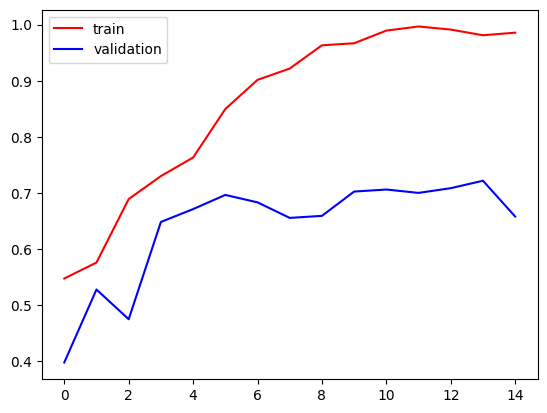

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label = 'train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

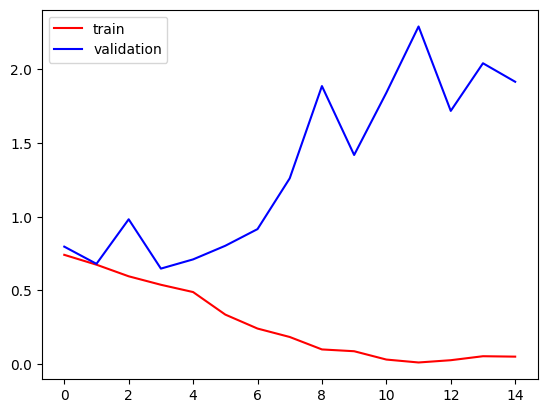

In [11]:
plt.plot(history.history['loss'], color='red', label = 'train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

## ways to reduce overfiting:
* add more data
* data augmentation
* l1, l2 regularization
* batch normalization
* dropout

### Batch Normalization and dropout

In [31]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
history = model.fit(train_ds, epochs=15, validation_data = validation_ds)

Epoch 1/15
68/68 [==============================] - 12s 127ms/step - loss: 4.9238 - accuracy: 0.5491 - val_loss: 8.1851 - val_accuracy: 0.4331
Epoch 2/15
68/68 [==============================] - 9s 129ms/step - loss: 2.3095 - accuracy: 0.5813 - val_loss: 9.9701 - val_accuracy: 0.6031
Epoch 3/15
68/68 [==============================] - 8s 112ms/step - loss: 1.2487 - accuracy: 0.5749 - val_loss: 1.4024 - val_accuracy: 0.5356
Epoch 4/15
68/68 [==============================] - 9s 116ms/step - loss: 1.0509 - accuracy: 0.5947 - val_loss: 1.0247 - val_accuracy: 0.5923
Epoch 5/15
68/68 [==============================] - 10s 138ms/step - loss: 0.8082 - accuracy: 0.6214 - val_loss: 1.0102 - val_accuracy: 0.5923
Epoch 6/15
68/68 [==============================] - 9s 128ms/step - loss: 0.6395 - accuracy: 0.6932 - val_loss: 0.7884 - val_accuracy: 0.5199
Epoch 7/15
68/68 [==============================] - 9s 128ms/step - loss: 0.5472 - accuracy: 0.7347 - val_loss: 0.6379 - val_accuracy: 0.6610
Epoc

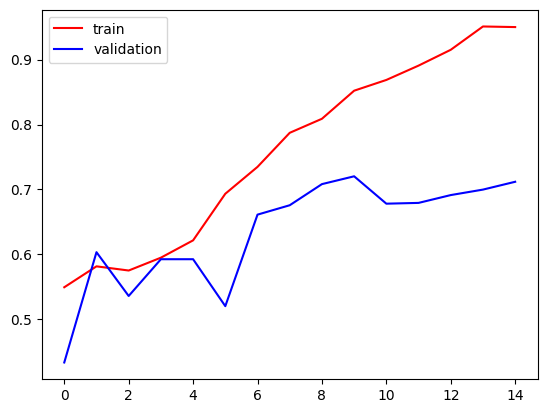

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label = 'train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

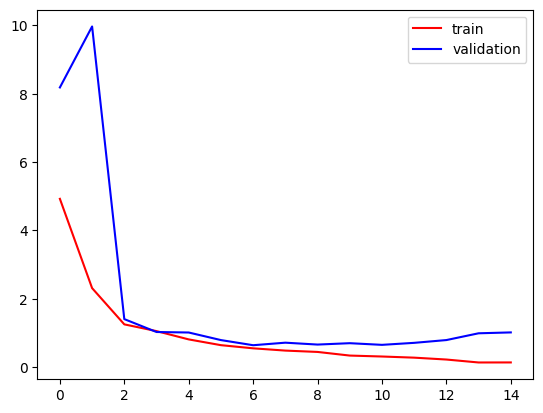

In [36]:
plt.plot(history.history['loss'], color='red', label = 'train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

# test case1

In [18]:
import cv2

In [69]:
test_img = cv2.imread('/content/dog.jpg')

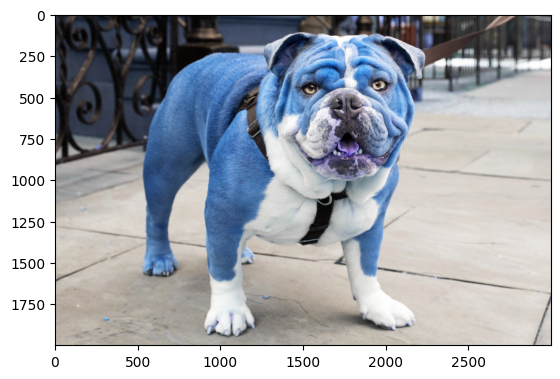

In [70]:
plt.imshow(test_img)

In [71]:
test_img.shape

(1999, 3000, 3)

In [72]:
test_img = cv2.resize(test_img, (256, 256))

In [73]:
test_input = test_img.reshape((1,256,256,3))

In [74]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [75]:
test = model.predict(test_input)
test = test > 0.5

if (test == 0):
  pred = 'cat'
else:
  pred = 'dog'

print('our model says its a :', pred)

1/1 [==============================] - 0s 24ms/step
our model says its a : dog


# test case2

In [41]:
test_img = cv2.imread('/content/cat.jpg')

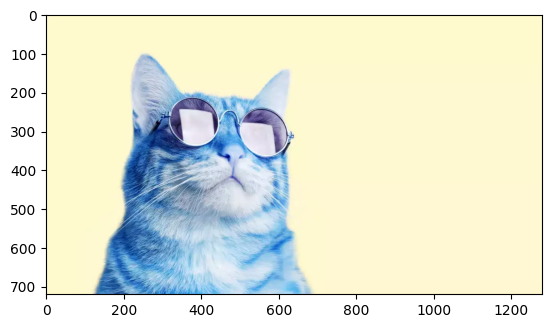

In [42]:
plt.imshow(test_img)

In [43]:
test_img.shape

(720, 1280, 3)

In [44]:
test_img = cv2.resize(test_img, (256, 256))

In [45]:
test_input = test_img.reshape((1,256,256,3))

In [68]:
model.predict(test_input)

1/1 [==============================] - 0s 92ms/step


array([[0.]], dtype=float32)

In [46]:
#model.predict(test_input)
test = model.predict(test_input)
test = test > 0.5

if (test == 0):
  pred = 'cat'
else:
  pred = 'dog'

print('our model says it a :', pred)

1/1 [==============================] - 0s 173ms/step
our model says it a : cat
